In [9]:
import pandas as pd
import sklearn

In [10]:
df = pd.read_csv('bpic15.preprocessed.labeled.mapped.csv')
print(df['CO'].nunique())
df

12


,Unnamed: 0,case:concept:name,concept:name,org:resource,time:timestamp,case_type,activity_type,time_type,CO
0,0,4284682,01_HOOFD_190_2,560852,2009-11-18 09:00:00,NaN,0-1-4-5,M-T-W-T-F,null/0-1-4-5/M-T-W-T-F
1,1,4511735,01_HOOFD_010,1254625,2009-11-23 09:00:00,NaN,0-1-4-5,M-T-W-T-F,null/0-1-4-5/M-T-W-T-F
2,2,3090877,01_HOOFD_065_2,3148844,2010-01-01 09:00:00,NaN,0-1-4-5,M-T-W-T-F,null/0-1-4-5/M-T-W-T-F
3,3,3871304,01_HOOFD_080,560532,2010-06-29 08:00:00,NaN,0-1-4-5,M-T-W-T-F,null/0-1-4-5/M-T-W-T-F
4,4,3007101,01_HOOFD_010,560749,2010-10-04 08:00:00,NaN,0-1-4-5,M-T-W-T-F,null/0-1-4-5/M-T-W-T-F
...,...,...,...,...,...,...,...,...,...
193448,193448,12751727,01_HOOFD_510_2a,560912,2015-03-05 09:00:00,NaN,0-1-4-5,M-T-W-T-F,null/0-1-4-5/M-T-W-T-F
193449,193449,12663845,01_HOOFD_510_2a,560912,2015-03-05 09:00:00,NaN,0-1-4-5,M-T-W-T-F,null/0-1-4-5/M-T-W-T-F
193450,193450,12999831,01_HOOFD_510_2a,560872,2015-03-09 09:00:00,NaN,0-1-4-5,M-T-W-T-F,null/0-1-4-5/M-T-W-T-F
193451,193451,12999831,01_HOOFD_510_2,560872,2015-03-09 09:00:00,NaN,0-1-4-5,M-T-W-T-F,null/0-1-4-5/M-T-W-T-F


In [11]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from math import log

X1 = df.groupby(['org:resource', 'concept:name']).size().unstack().fillna(0)
X2 = df.groupby(['org:resource', 'CO']).size().unstack().fillna(0)
#X = X.applymap(lambda x: log(x + 1))

best_k = -1
best_score = -2

# for k in range(2, len(X)):
#     clu = AgglomerativeClustering(n_clusters=k).fit_predict(X)
#     ss = silhouette_score(X, clu)
#     if ss > best_score:
#         best_score = ss
#         best_k = k
# print(best_k)

# clu = AgglomerativeClustering(n_clusters=best_k).fit_predict(X)
# print(best_k)
# print(silhouette_score(X, clu))

l_ss1 = []
l_ss2 = []
for k in range(2, len(X1)):
    clu1 = AgglomerativeClustering(n_clusters=k).fit_predict(X1)
    ss1 = silhouette_score(X1, clu1)
    l_ss1.append(ss1)
    clu2 = AgglomerativeClustering(n_clusters=k).fit_predict(X2)
    ss2 = silhouette_score(X2, clu2)
    l_ss2.append(ss2)

data = []
for i in range(len(l_ss1)):
    data.append({'k': i + 2, 'score': l_ss2[i], 'matrix based on': 'Execution Context'})
    data.append({'k': i + 2, 'score': l_ss1[i], 'matrix based on': 'Activity'})

data = pd.DataFrame(data)

data

,k,score,matrix based on
0,2,0.715024,Execution Context
1,2,0.610249,Activity
2,3,0.725547,Execution Context
3,3,0.643522,Activity
4,4,0.724483,Execution Context
...,...,...,...
133,68,0.022804,Activity
134,69,0.042254,Execution Context
135,69,0.013330,Activity
136,70,0.000000,Execution Context


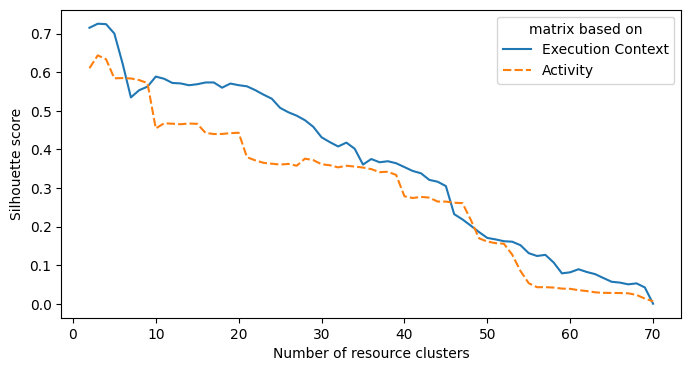

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.lineplot(data=data, x="k", y="score", ax=ax, hue="matrix based on", style='matrix based on')
plt.xlabel('Number of resource clusters')
plt.ylabel("Silhouette score")
plt.show()